In [3]:
!nvidia-smi

'nvidia-smi' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
from __future__ import print_function
import tensorflow as tf

import random
import numpy as np
import pandas as pd

import scipy.io
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
import cv2

In [2]:
import os
fl = os.path.join('D:\data_bonn\Patient_1\Maydata\\','Patient_1_test_segment_0001.mat')
data = scipy.io.loadmat(fl)
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 21 01:00:00 2014', '__version__': '1.0', '__globals__': [], 'test_segment_1': array([[(array([[ 300,  300,  301, ..., -322, -324, -325],
               [  33,   33,   34, ..., -318, -319, -322],
               [ -91,  -91,  -90, ...,   29,   28,   27],
               ...,
               [-255, -254, -255, ..., -150, -150, -151],
               [-438, -438, -439, ...,  -40,  -38,  -37],
               [ 445,  445,  444, ..., -460, -460, -460]], dtype=int16), array([[600]], dtype=uint16), array([[5000]], dtype=uint16), array([[array(['LD_1'], dtype='<U4'), array(['LD_3'], dtype='<U4'),
                array(['LD_4'], dtype='<U4'), array(['LD_5'], dtype='<U4'),
                array(['LD_6'], dtype='<U4'), array(['LD_7'], dtype='<U4'),
                array(['LD_8'], dtype='<U4'), array(['RD_1'], dtype='<U4'),
                array(['RD_2'], dtype='<U4'), array(['RD_3'], dtype='<U4'),
                array(['RD_4'

In [3]:
from scipy.io import loadmat
annots = loadmat('D:\data_bonn\Patient_1\Maydata/Patient_1_interictal_segment_0001.mat')

In [4]:
#channel 0
annots['interictal_segment_1'][0][0][0][0].shape

(3000000,)

In [5]:
#channel 1
annots['interictal_segment_1'][0][0][0][1].shape

(3000000,)

In [6]:
#Visualizing an example:
interictal_tst = 'D:\data_bonn\Patient_1\Maydata/Patient_1_interictal_segment_0001.mat'
preictal_tst = 'D:\data_bonn\Patient_1\Maydata/Patient_1_preictal_segment_0001.mat'
interictal_data = scipy.io.loadmat(interictal_tst)
preictal_data = scipy.io.loadmat(preictal_tst)

In [7]:
interictal_array = interictal_data['interictal_segment_1'][0][0][0]
preictal_array = preictal_data['preictal_segment_1'][0][0][0]

In [9]:
from scipy import signal

Interictal
[ 589  590  591 ... -489 -490 -493]


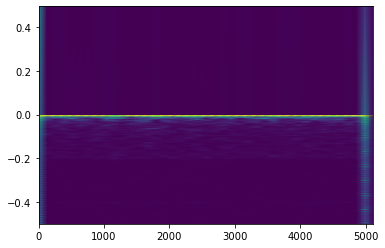

Preictal


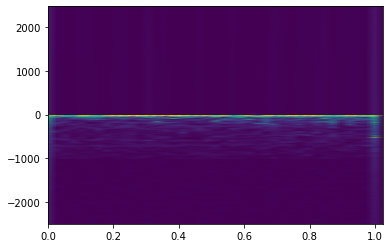

Interictal
[ 589  590  591 ... -489 -490 -493]


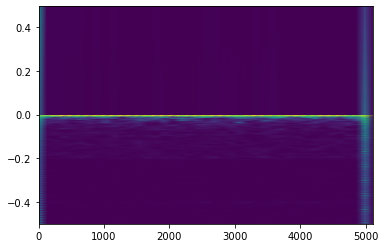

Preictal


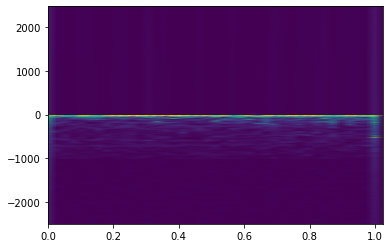

In [26]:
# Taking 1 second worth of data of channel 0 for preictal example
# 15 channels
l = list(range(10000))
for i in l[::5000]:
    print('Interictal')
    i_secs = interictal_array[14][i:i+5000]
    print(interictal_array[14])
    i_f, i_t, i_Sxx = signal.stft(i_secs, return_onesided=False)
    i_SS = np.log1p(i_Sxx)
    plt.pcolormesh(i_t, i_f, np.abs(i_SS), shading='gouraud')
    plt.show()
    print('Preictal')
    p_secs = preictal_array[1][i:i+5000]
    p_f, p_t, p_Sxx = signal.stft(p_secs, fs=5000, return_onesided=False)
    all_X[i] = np.log1p(p_Sxx)
    plt.pcolormesh(p_t, p_f, np.abs(p_SS), shading='gouraud')
    plt.show()
    

In [27]:
all_X[i]

array([[ 6.32800696-3.14159265j,  5.99476117-3.14159265j,
         5.39651968-3.14159265j, ...,  5.71588028+0.j        ,
         6.3764005 +0.j        ,  2.09186203+0.j        ],
       [ 7.95819047-1.25247368j,  4.77680442-2.75047952j,
         6.08479942+0.30122359j, ...,  6.04026047+2.74792658j,
         7.73654525+1.36566327j,  2.0903075 -0.12074538j],
       [ 8.9515675 +1.01633471j,  9.22973571-2.78580796j,
         9.22520392+0.57834784j, ...,  9.16015201+2.41497157j,
         8.98549282-1.23451802j,  2.08564435-0.24168438j],
       ...,
       [ 9.32047366+3.0513502j , 10.03076381-0.35330145j,
        10.0309623 +2.56331213j, ...,  9.96562484+0.7291537j ,
         9.3965794 -2.67657234j,  2.07787421+0.36301347j],
       [ 8.9515675 -1.01633471j,  9.22973571+2.78580796j,
         9.22520392-0.57834784j, ...,  9.16015201-2.41497157j,
         8.98549282+1.23451802j,  2.08564435+0.24168438j],
       [ 7.95819047+1.25247368j,  4.77680442+2.75047952j,
         6.08479942-0.30122359

In [32]:
# Creating training and testing data
all_X = []
all_Y = []
allp_f = []
allp_t = []

types = ['Patient_1_interictal_segment', 'Patient_1_preictal_segment']

for i,typ in enumerate(types):
    # Looking at 18 files for each event for a balanced dataset
    for j in range(18):
        fl = 'D:\data_bonn\Patient_1\Maydata\{}_{}.mat'.format(typ, str(j + 1).zfill(4))
        data = scipy.io.loadmat(fl)
        k = typ.replace('Patient_1_', '') + '_'
        d_array = data[k + str(j + 1)][0][0][0]
        lst = list(range(3000000))  # 10 minutes   5000*600
        for m in lst[::5000]:
            arr=[]
            # Create a spectrogram every 1 second
            p_secs = d_array[0][m:m+5000]
            p_f, p_t, p_Sxx = signal.stft(p_secs, fs=5000, return_onesided=False)
            p_SS = np.log1p(p_Sxx)
            arr.append(p_SS)
            allp_f.append(p_f)
            allp_t.append(p_t)
            
            p_secs = d_array[1][m:m+5000]
            p_f, p_t, p_Sxx = signal.stft(p_secs, fs=5000, return_onesided=False)
            p_SS = np.log1p(p_Sxx)          #P_SS spectogram
            arr.append(p_SS)
            allp_f.append(p_f)
            allp_t.append(p_t)
            
            p_secs = d_array[2][m:m+5000]
            p_f, p_t, p_Sxx = signal.stft(p_secs, fs=5000, return_onesided=False)
            p_SS = np.log1p(p_Sxx)
            arr.append(p_SS)
            allp_f.append(p_f)
            allp_t.append(p_t)
            
            #arr=np.reshape(arr,(256,22,3))
            all_X.append(arr)
            all_Y.append(i)

In [38]:
allp_f[0]

array([    0.     ,    19.53125,    39.0625 ,    58.59375,    78.125  ,
          97.65625,   117.1875 ,   136.71875,   156.25   ,   175.78125,
         195.3125 ,   214.84375,   234.375  ,   253.90625,   273.4375 ,
         292.96875,   312.5    ,   332.03125,   351.5625 ,   371.09375,
         390.625  ,   410.15625,   429.6875 ,   449.21875,   468.75   ,
         488.28125,   507.8125 ,   527.34375,   546.875  ,   566.40625,
         585.9375 ,   605.46875,   625.     ,   644.53125,   664.0625 ,
         683.59375,   703.125  ,   722.65625,   742.1875 ,   761.71875,
         781.25   ,   800.78125,   820.3125 ,   839.84375,   859.375  ,
         878.90625,   898.4375 ,   917.96875,   937.5    ,   957.03125,
         976.5625 ,   996.09375,  1015.625  ,  1035.15625,  1054.6875 ,
        1074.21875,  1093.75   ,  1113.28125,  1132.8125 ,  1152.34375,
        1171.875  ,  1191.40625,  1210.9375 ,  1230.46875,  1250.     ,
        1269.53125,  1289.0625 ,  1308.59375,  1328.125  ,  1347

In [39]:
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(128, 128))
columns = 4
rows = 5
for i in l[::5000]:
        img = np.random.randint(100)
        fig.add_subplot(rows, columns, i)
        for i in range(1, columns*rows +1):
            plt.pcolormesh(allp_t[], allp_f[], np.abs(all_X[]), shading='gouraud')


w=10
h=10
fig=plt.figure(figsize=(128, 128))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(all_X[i][:,:,0])
plt.show()

SyntaxError: invalid syntax (<ipython-input-39-d00429e0d43e>, line 3)

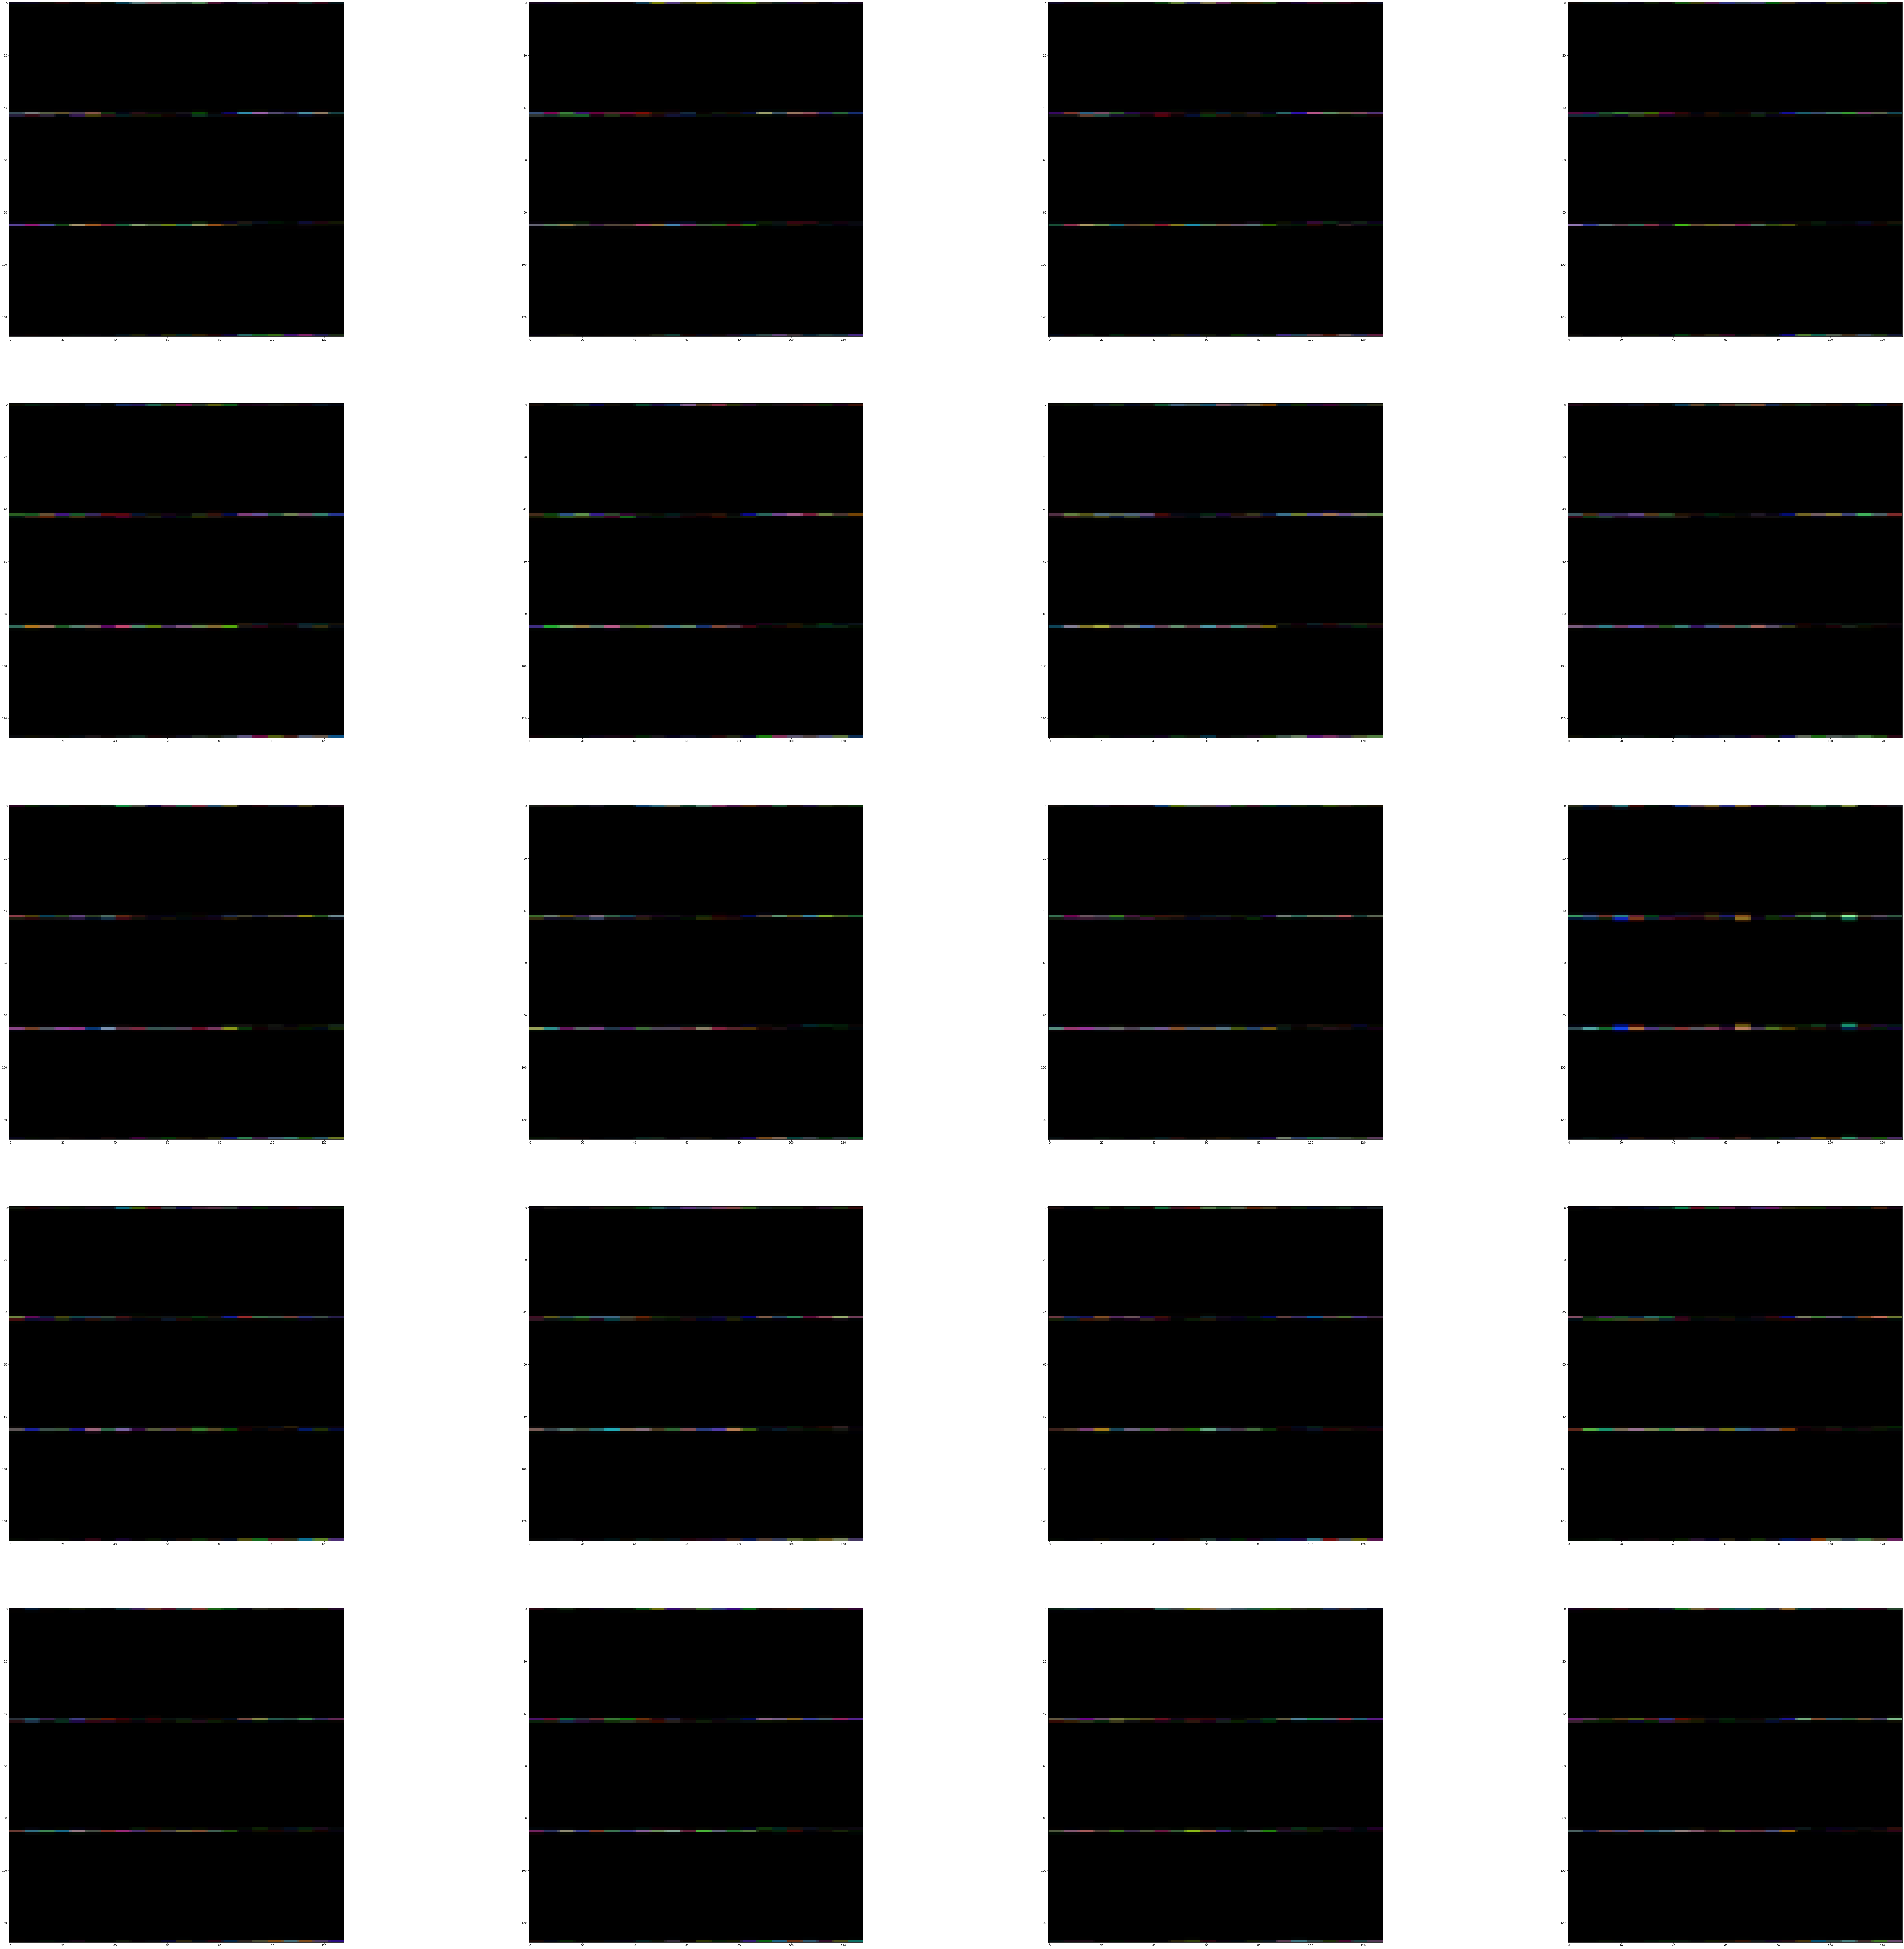

In [0]:
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(128, 128))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(all_X[i])
plt.show()

In [0]:
for i in range(len(all_X)):
  name=f'/content/images/image{i}_label{all_Y[i]}.jpg'
  plt.imsave(name,all_X[i])

In [0]:
os.listdir('/content/images')

['image5039_label0.jpg',
 'image1415_label0.jpg',
 'image20474_label1.jpg',
 'image5190_label0.jpg',
 'image19181_label1.jpg',
 'image6751_label0.jpg',
 'image21080_label1.jpg',
 'image14228_label1.jpg',
 'image18181_label1.jpg',
 'image1305_label0.jpg',
 'image19471_label1.jpg',
 'image8983_label0.jpg',
 'image10934_label1.jpg',
 'image6524_label0.jpg',
 'image306_label0.jpg',
 'image1437_label0.jpg',
 'image10585_label0.jpg',
 'image856_label0.jpg',
 'image17868_label1.jpg',
 'image20736_label1.jpg',
 'image3893_label0.jpg',
 'image13575_label1.jpg',
 'image14445_label1.jpg',
 'image19074_label1.jpg',
 'image16873_label1.jpg',
 'image3745_label0.jpg',
 'image5759_label0.jpg',
 'image4968_label0.jpg',
 'image7156_label0.jpg',
 'image928_label0.jpg',
 'image6337_label0.jpg',
 'image3618_label0.jpg',
 'image19916_label1.jpg',
 'image18750_label1.jpg',
 'image9058_label0.jpg',
 'image8416_label0.jpg',
 'image8037_label0.jpg',
 'image9413_label0.jpg',
 'image20824_label1.jpg',
 'image858_